In [1]:
"""
"""
import numpy as np
from matplotlib import pyplot as plt

import larnestpy

In [2]:
# energies from 100 eV to 100 MeV
# efield set to 500 V/cm
# density in g/cm^3

energy_range = np.linspace(0.1, 100000.0, 1000000)
efield = 500.0
density = 1.393


In [3]:
calc = larnestpy.LArNEST()

@np.vectorize
def calculate(calc, interaction, energy, dx, efield, density):
    return calc.full_calculation(interaction, energy, dx, efield, density, False)

In [4]:
larnest_results_er = calculate(calc, larnestpy.ER, energy_range, 0.01, efield, density)
larnest_results_nr = calculate(calc, larnestpy.NR, energy_range, 0.01, efield, density)
larnest_results_alpha = calculate(calc, larnestpy.Alpha, energy_range, 0.01, efield, density)

ndlar_box_results_1mm = calculate(calc, larnestpy.BOX, energy_range, 0.01, efield, density)
ndlar_box_results_1cm = calculate(calc, larnestpy.BOX, energy_range, 0.1, efield, density)

ndlar_birks_results_1mm = calculate(calc, larnestpy.BIRKS, energy_range, 0.01, efield, density)
ndlar_birks_results_1cm = calculate(calc, larnestpy.BIRKS, energy_range, 0.1, efield, density)

dedx_results_1mm = calculate(calc, larnestpy.dEdx, energy_range, 0.01, efield, density)
dedx_results_1cm = calculate(calc, larnestpy.dEdx, energy_range, 0.1, efield, density)

/home/ncarrara/anaconda3/envs/blip/lib/python3.10/site-packages/numpy/lib/function_base.py:2411: RuntimeWarning: divide by zero encountered in calculate (vectorized)
  outputs = ufunc(*inputs)
/home/ncarrara/anaconda3/envs/blip/lib/python3.10/site-packages/numpy/lib/function_base.py:2411: RuntimeWarning: invalid value encountered in calculate (vectorized)
  outputs = ufunc(*inputs)


In [8]:
larnest_ne_er = np.array([larnest_results_er[ii].yields.Ne for ii in range(len(larnest_results_er))])
larnest_nph_er = np.array([larnest_results_er[ii].yields.Nph for ii in range(len(larnest_results_er))])
larnest_rp_er = np.array([larnest_results_er[ii].yields.RecombinationProbability for ii in range(len(larnest_results_er))])

larnest_ne_nr = np.array([larnest_results_nr[ii].yields.Ne for ii in range(len(larnest_results_nr))])
larnest_nph_nr = np.array([larnest_results_nr[ii].yields.Nph for ii in range(len(larnest_results_nr))])
larnest_rp_nr = np.array([larnest_results_nr[ii].yields.RecombinationProbability for ii in range(len(larnest_results_nr))])

larnest_ne_alpha = np.array([larnest_results_alpha[ii].yields.Ne for ii in range(len(larnest_results_alpha))])
larnest_nph_alpha = np.array([larnest_results_alpha[ii].yields.Nph for ii in range(len(larnest_results_alpha))])
larnest_rp_alpha = np.array([larnest_results_alpha[ii].yields.RecombinationProbability for ii in range(len(larnest_results_alpha))])

ndlar_box_ne_1mm = np.array([ndlar_box_results_1mm[ii].yields.Ne for ii in range(len(ndlar_box_results_1mm))])
ndlar_box_nph_1mm = np.array([ndlar_box_results_1mm[ii].yields.Nph for ii in range(len(ndlar_box_results_1mm))])
ndlar_box_rp_1mm = np.array([ndlar_box_results_1mm[ii].yields.RecombinationProbability for ii in range(len(ndlar_box_results_1mm))])

ndlar_box_ne_1cm = np.array([ndlar_box_results_1cm[ii].yields.Ne for ii in range(len(ndlar_box_results_1cm))])
ndlar_box_nph_1cm = np.array([ndlar_box_results_1cm[ii].yields.Nph for ii in range(len(ndlar_box_results_1cm))])
ndlar_box_rp_1cm = np.array([ndlar_box_results_1cm[ii].yields.RecombinationProbability for ii in range(len(ndlar_box_results_1cm))])

ndlar_birks_ne_1mm = np.array([ndlar_birks_results_1mm[ii].yields.Ne for ii in range(len(ndlar_birks_results_1mm))])
ndlar_birks_nph_1mm = np.array([ndlar_birks_results_1mm[ii].yields.Nph for ii in range(len(ndlar_birks_results_1mm))])
ndlar_birks_rp_1mm = np.array([ndlar_birks_results_1mm[ii].yields.RecombinationProbability for ii in range(len(ndlar_birks_results_1mm))])

ndlar_birks_ne_1cm = np.array([ndlar_birks_results_1cm[ii].yields.Ne for ii in range(len(ndlar_birks_results_1cm))])
ndlar_birks_nph_1cm = np.array([ndlar_birks_results_1cm[ii].yields.Nph for ii in range(len(ndlar_birks_results_1cm))])
ndlar_birks_rp_1cm = np.array([ndlar_birks_results_1cm[ii].yields.RecombinationProbability for ii in range(len(ndlar_birks_results_1cm))])

dedx_ne_1mm = np.array([dedx_results_1mm[ii].yields.Ne for ii in range(len(dedx_results_1mm))])
dedx_nph_1mm = np.array([dedx_results_1mm[ii].yields.Nph for ii in range(len(dedx_results_1mm))])
dedx_rp_1mm = np.array([dedx_results_1mm[ii].yields.RecombinationProbability for ii in range(len(dedx_results_1mm))])

dedx_ne_1cm = np.array([dedx_results_1cm[ii].yields.Ne for ii in range(len(dedx_results_1cm))])
dedx_nph_1cm = np.array([dedx_results_1cm[ii].yields.Nph for ii in range(len(dedx_results_1cm))])
dedx_rp_1cm = np.array([dedx_results_1cm[ii].yields.RecombinationProbability for ii in range(len(dedx_results_1cm))])

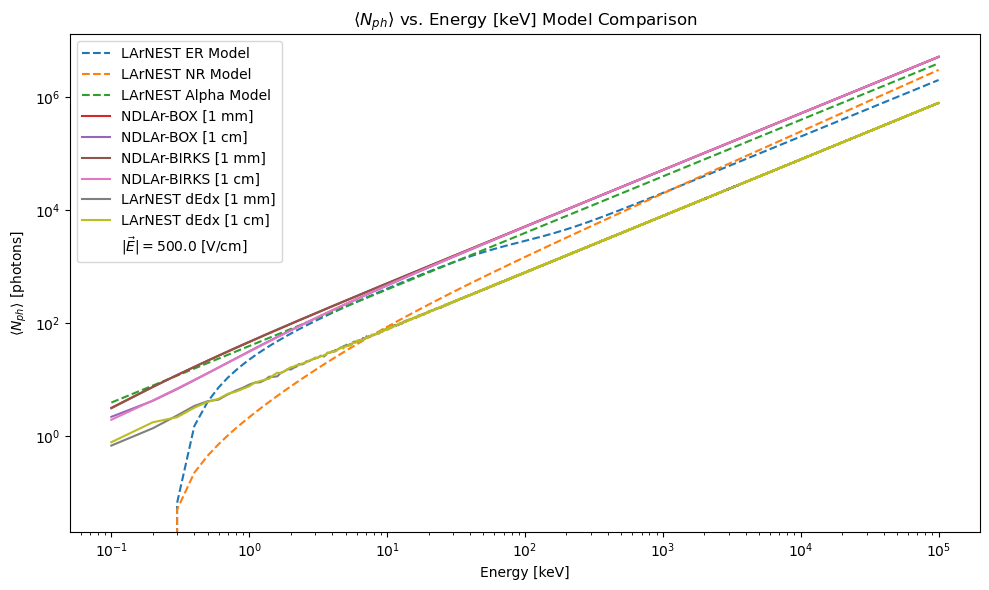

In [9]:
fig, axs = plt.subplots(figsize=(10,6))
axs.plot(energy_range, larnest_nph_er, label="LArNEST ER Model", linestyle='--')
axs.plot(energy_range, larnest_nph_nr, label="LArNEST NR Model", linestyle='--')
axs.plot(energy_range, larnest_nph_alpha, label="LArNEST Alpha Model", linestyle='--')
axs.plot(energy_range, ndlar_box_nph_1mm, label="NDLAr-BOX [1 mm]")
axs.plot(energy_range, ndlar_box_nph_1cm, label="NDLAr-BOX [1 cm]")
axs.plot(energy_range, ndlar_birks_nph_1mm, label="NDLAr-BIRKS [1 mm]")
axs.plot(energy_range, ndlar_birks_nph_1cm, label="NDLAr-BIRKS [1 cm]")
axs.plot(energy_range, dedx_nph_1mm, label="LArNEST dEdx [1 mm]")
axs.plot(energy_range, dedx_nph_1cm, label="LArNEST dEdx [1 cm]")
axs.scatter([],[],label=r"$|\vec{E}| = $"+f"{efield} [V/cm]", marker='')
axs.set_yscale("log")
axs.set_xscale("log")
axs.set_xlabel("Energy [keV]")
axs.set_ylabel(r"$\langle N_{ph}\rangle$" + f" [photons]")
plt.title(r"$\langle N_{ph}\rangle$" + f" vs. Energy [keV] Model Comparison")
plt.legend()
plt.tight_layout()

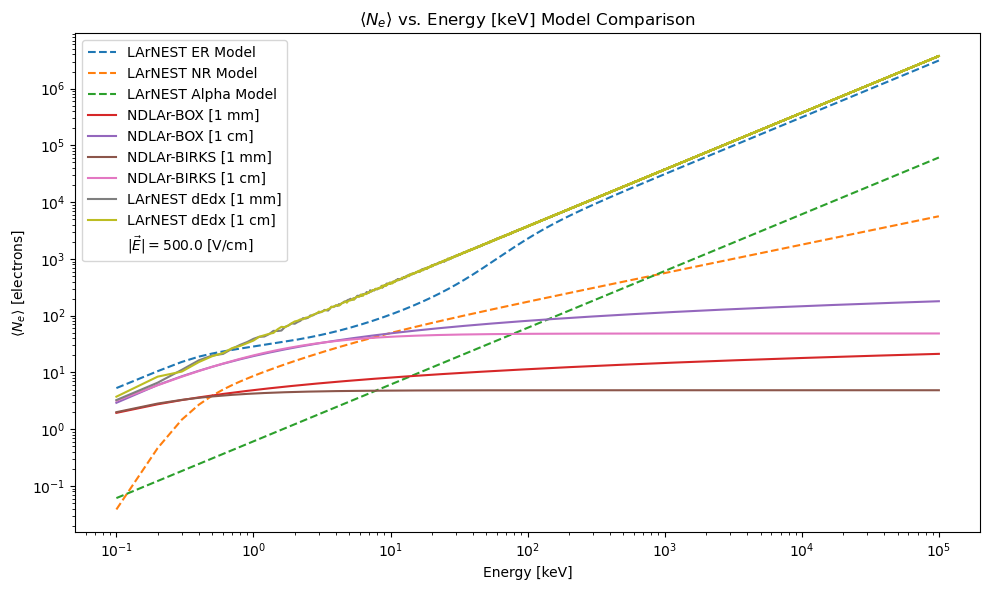

In [10]:
fig, axs = plt.subplots(figsize=(10,6))
axs.plot(energy_range, larnest_ne_er, label="LArNEST ER Model", linestyle='--')
axs.plot(energy_range, larnest_ne_nr, label="LArNEST NR Model", linestyle='--')
axs.plot(energy_range, larnest_ne_alpha, label="LArNEST Alpha Model", linestyle='--')
axs.plot(energy_range, ndlar_box_ne_1mm, label="NDLAr-BOX [1 mm]")
axs.plot(energy_range, ndlar_box_ne_1cm, label="NDLAr-BOX [1 cm]")
axs.plot(energy_range, ndlar_birks_ne_1mm, label="NDLAr-BIRKS [1 mm]")
axs.plot(energy_range, ndlar_birks_ne_1cm, label="NDLAr-BIRKS [1 cm]")
axs.plot(energy_range, dedx_ne_1mm, label="LArNEST dEdx [1 mm]")
axs.plot(energy_range, dedx_ne_1cm, label="LArNEST dEdx [1 cm]")
axs.scatter([],[],label=r"$|\vec{E}| = $"+f"{efield} [V/cm]", marker='')
axs.set_yscale("log")
axs.set_xscale("log")
axs.set_xlabel("Energy [keV]")
axs.set_ylabel(r"$\langle N_{e}\rangle$" + f" [electrons]")
plt.title(r"$\langle N_{e}\rangle$" + f" vs. Energy [keV] Model Comparison")
plt.legend()
plt.tight_layout()

[0. 0. 0. ... 0. 0. 0.]


/tmp/ipykernel_72777/3003313787.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/ncarrara/anaconda3/envs/blip/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/ncarrara/anaconda3/envs/blip/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


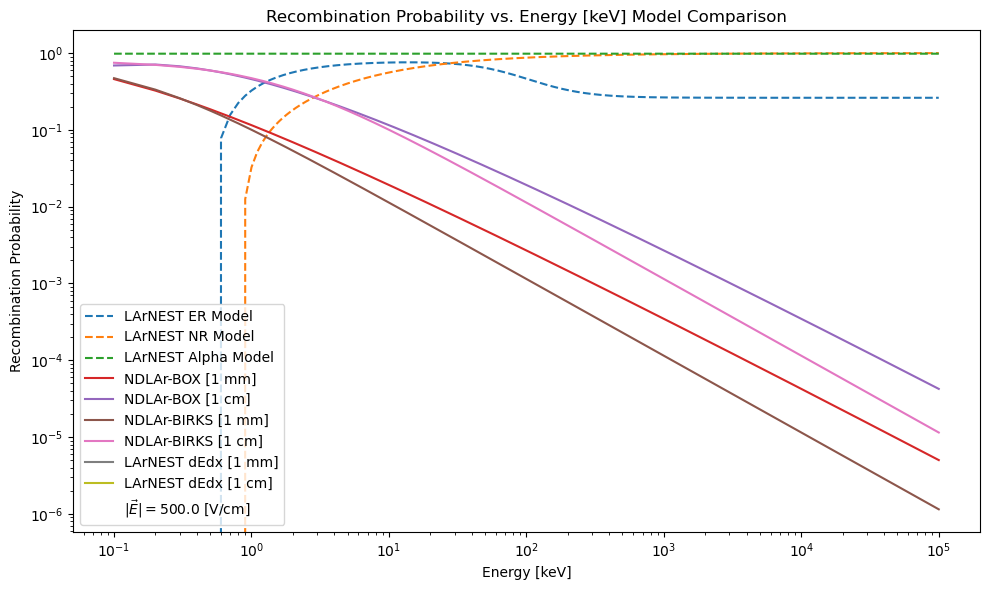

In [13]:
fig, axs = plt.subplots(figsize=(10,6))
axs.plot(energy_range, larnest_rp_er, label="LArNEST ER Model", linestyle='--')
axs.plot(energy_range, larnest_rp_nr, label="LArNEST NR Model", linestyle='--')
axs.plot(energy_range, larnest_rp_alpha, label="LArNEST Alpha Model", linestyle='--')
axs.plot(energy_range, ndlar_box_rp_1mm, label="NDLAr-BOX [1 mm]")
axs.plot(energy_range, ndlar_box_rp_1cm, label="NDLAr-BOX [1 cm]")
axs.plot(energy_range, ndlar_birks_rp_1mm, label="NDLAr-BIRKS [1 mm]")
axs.plot(energy_range, ndlar_birks_rp_1cm, label="NDLAr-BIRKS [1 cm]")
axs.plot(energy_range, dedx_rp_1mm, label="LArNEST dEdx [1 mm]")
axs.plot(energy_range, dedx_rp_1cm, label="LArNEST dEdx [1 cm]")
axs.scatter([],[],label=r"$|\vec{E}| = $"+f"{efield} [V/cm]", marker='')
axs.set_yscale("log")
axs.set_xscale("log")
axs.set_xlabel("Energy [keV]")
axs.set_ylabel("Recombination Probability")
plt.title(f"Recombination Probability vs. Energy [keV] Model Comparison")
plt.legend()
plt.tight_layout()